<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #031a8eff, #1934acff);
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Titanic Survival Prediction using Random Forest Classifier
    </h1>
</div>


<h4 style="color:#002affff">1. Importing essential libraries for data analysis (Pandas, NumPy), visualization (Matplotlib, Seaborn), and machine learning tasks including preprocessing and classification (RandomForestClassifier, XGBClassifier)</h4>

In [274]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score

<h4 style="color:#0082fcff">2. Loading the hotel bookings dataset from CSV, displaying its shape (rows × columns), and previewing the full DataFrame</h4>

In [275]:
hotel_data=pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\GTC-ML-internship\Project 01\Data\hotel_bookings.csv")
print(hotel_data.shape)
print("------------")
hotel_data

(119390, 32)
------------


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<h4 style="color:#0082fcff">3. Creating side-by-side pie charts to visualize the distribution of bookings by arrival month and the proportion of canceled vs. not canceled reservations</h4>

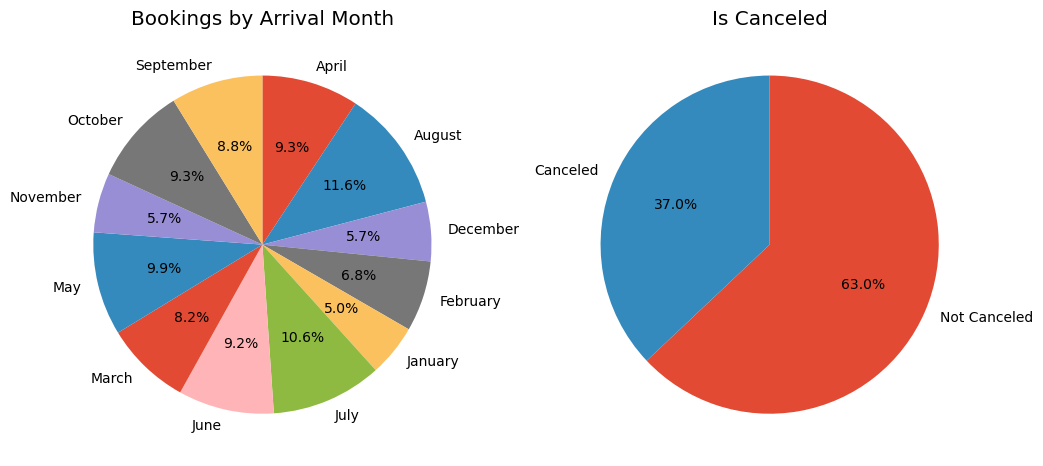

In [276]:
month_counts = hotel_data['arrival_date_month'].value_counts().sort_index()
IisCanceled = hotel_data['is_canceled'].value_counts().sort_index()
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].pie(month_counts,labels=month_counts.index,autopct='%1.1f%%',startangle=90,counterclock=False)
axes[0].set_title("Bookings by Arrival Month")
axes[1].pie(IisCanceled,labels=["Not Canceled","Canceled"],autopct='%1.1f%%',startangle=90,counterclock=False)
axes[1].set_title("Is Canceled")
plt.show()


<h4 style="color:#0082fcff">4. Filtering the dataset to retrieve reservations with a lead time of 342 days, arrival month of July, and arrival year of 2015</h4>

In [277]:
hotel_data.query("lead_time==342").query("arrival_date_month=='July'").query("arrival_date_year==2015")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


<h4 style="color:#0082fcff">5. Generating dataset summary by retrieving structural information with <code>.info()</code> and statistical description with <code>.describe()</code>, then attempting to concatenate them for combined overview</h4>

In [278]:
x=hotel_data.info()
y=hotel_data.describe()
z=pd.concat([x,y],axis=1)
z

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<h4 style="color:#0082fcff">6. Checking for missing values by printing the total number of null entries in the dataset and then showing the count of nulls per column</h4>

In [279]:
print(hotel_data.isna().sum().sum())
print("------------------------------")
print(hotel_data.isna().sum())

129425
------------------------------
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent              

<h4 style="color:#0082fcff">7. Visualizing columns with missing values using a bar chart to show the count of null entries per column</h4>

<Axes: xlabel='Missing Values per Column', ylabel='Count of Missing Values'>

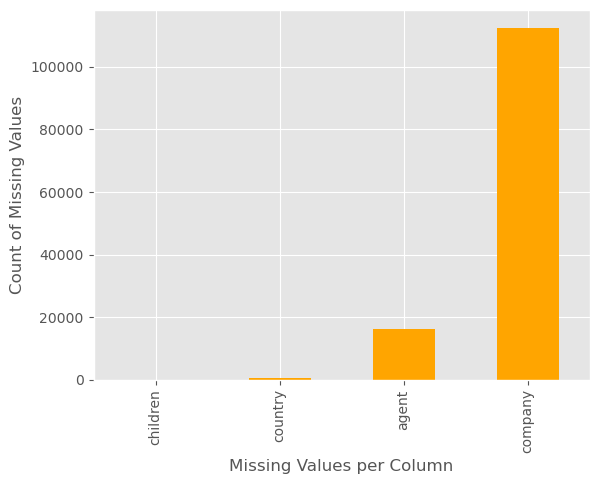

In [280]:
mis=hotel_data.isna().sum()
mis[mis>0].plot(kind='bar',color='orange',xlabel='Missing Values per Column',ylabel='Count of Missing Values')

<h4 style="color:#0082fcff">8. Creating side-by-side boxplots for ADR, Agent, and Lead Time to identify distributions and detect potential outliers in these numerical features</h4>

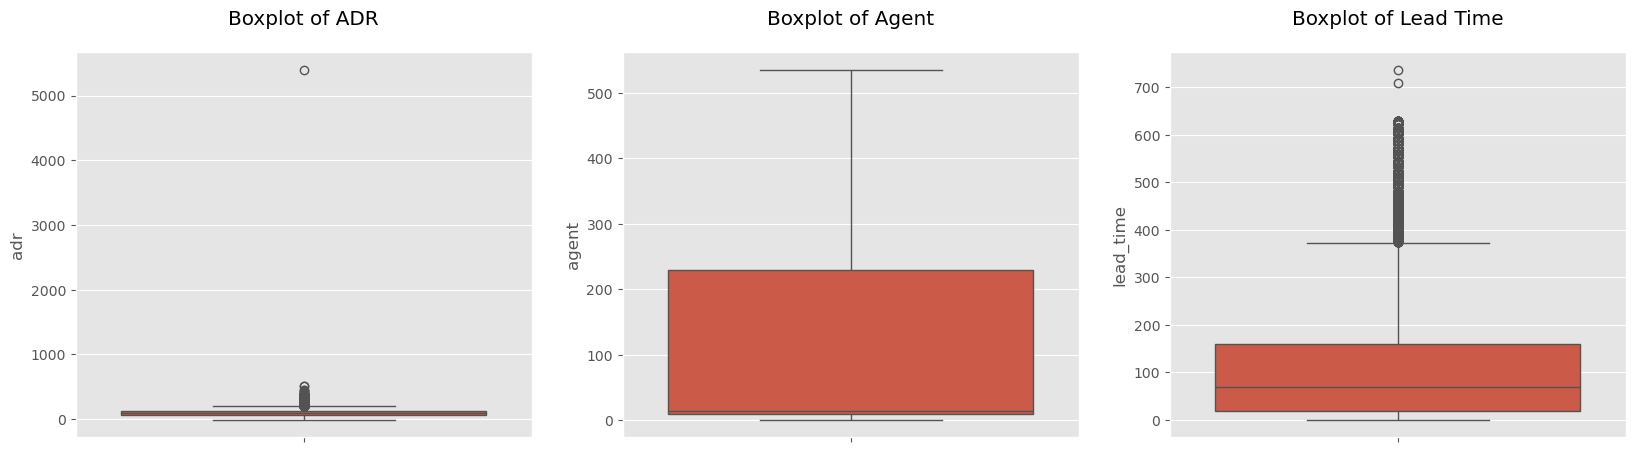

In [281]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y=hotel_data["adr"])
plt.title("Boxplot of ADR",y=1.05)

plt.subplot(1,3,2)
sns.boxplot(y=hotel_data["agent"])
plt.title("Boxplot of Agent",y=1.05)

plt.subplot(1,3,3)
sns.boxplot(y=hotel_data["lead_time"])
plt.title("Boxplot of Lead Time",y=1.05)

plt.show()

<h1 style="color:#0082fcff">Document </h1>  

* **Missing Values**: Multiple columns such as <code>company</code>, <code>agent</code>, and <code>country</code> contain null entries, with varying proportions across features.
* **Outliers in Numerical Columns**: The <code>adr</code> feature shows extreme outliers (values above 5000), <code>agent</code> contains many zero/missing values, and <code>lead\_time</code> has unusually high values (over 600 days).
* **Potential Data Inconsistencies**: Presence of placeholder values like 0 for <code>agent</code> or <code>company</code>, and the possibility of duplicate or near-duplicate bookings that require further inspection.


<h4 style="color:#0082fcff">9. Handling missing values by filling company and agent with 0, country with the most frequent value (mode), and children with the median</h4>

In [282]:
print(f"Missing Values Before Handle : {hotel_data.isna().sum().sum()}")
hotel_data['company']=hotel_data['company'].fillna(0)
hotel_data['agent']=hotel_data['agent'].fillna(0)
hotel_data['country']=hotel_data['country'].fillna(hotel_data['country'].mode()[0])
hotel_data['children']=hotel_data['children'].fillna(hotel_data['children'].median())

Missing Values Before Handle : 129425


<h4 style="color:#0082fcff">10. Verifying successful handling of missing values by printing the total number of null entries remaining in the dataset</h4>

In [283]:
print(f"Missing Values After Handle : {hotel_data.isna().sum().sum()}")

Missing Values After Handle : 0


<h4 style="color:#0082fcff">11. Checking dataset shape before and after removing duplicate rows to ensure data consistency</h4>

In [284]:
print(f"Number of Row Before Duplicates : {hotel_data.shape}")
hotel_data.drop_duplicates(inplace=True)
print(f"Number of Row Before Duplicates : {hotel_data.shape}")


Number of Row Before Duplicates : (119390, 32)
Number of Row Before Duplicates : (87377, 32)


<h4 style="color:#0082fcff">12. Identifying and removing extreme outliers in ADR values greater than 1000 to maintain realistic booking rates</h4>

In [285]:
print((hotel_data['adr'] > 1000).sum())
hotel_data= hotel_data[hotel_data['adr'] < 1000]
print((hotel_data['adr'] > 1000).sum())

1
0


<h4 style="color:#0082fcff">13. Filtering out unrealistic lead_time values above 700 days to eliminate extreme outliers from the dataset</h4>

In [286]:
print((hotel_data['lead_time'] > 700).sum())
hotel_data= hotel_data[hotel_data['lead_time'] < 700]
print((hotel_data['lead_time'] > 1000).sum())

2
0


<h4 style="color:#0082fcff">14. Converting <code>reservation_status_date</code> column to datetime format and extracting the month component from the first entry</h4>

In [287]:
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'], errors='coerce')
hotel_data['reservation_status_date'].dt.month.iloc[0] 

np.int32(7)

<h4 style="color:#0082fcff">15. Creating new engineered features: total guests (adults+children+babies), total nights (weekend+week nights), and family indicator based on presence of children or babies</h4>

In [288]:
hotel_data['total_guest']=hotel_data['adults']+hotel_data['children']+hotel_data['babies']
hotel_data['total_nights']=hotel_data['stays_in_weekend_nights']+hotel_data['stays_in_week_nights']
hotel_data['is_family']=np.where(((hotel_data['children']>0)|(hotel_data['babies']>0)),"Yes","No")


<h4 style="color:#0082fcff">16. Displaying the frequency distribution of meal plan categories in the dataset</h4>

In [289]:
hotel_data['meal'].value_counts()

meal
BB           67960
SC            9481
HB            9083
Undefined      490
FB             360
Name: count, dtype: int64

<h4 style="color:#0082fcff">17. Applying one-hot encoding to categorical columns (meal, market_segment, distribution_channel) while dropping the first category to avoid multicollinearity</h4>

In [290]:
hotel_data=pd.get_dummies(hotel_data,columns=['meal','market_segment','distribution_channel'],drop_first=True)

<h4 style="color:#0082fcff">18. Encoding the <code>country</code> column by mapping each country to its frequency count in the dataset</h4>

In [291]:
connnn= hotel_data["country"].value_counts(normalize=False).to_dict()
hotel_data["country"]=hotel_data["country"].map(connnn)

<h4 style="color:#0082fcff">19. Converting the categorical feature <code>deposit_type</code> into numeric values (0: No Deposit, 1: Non Refund, 2: Refundable) and displaying their frequency distribution</h4>

In [292]:
hotel_data['deposit_type']=hotel_data['deposit_type'].map({'No Deposit':0,'Non Refund':1,'Refundable':2})
hotel_data['deposit_type'].value_counts()

deposit_type
0    86230
1     1037
2      107
Name: count, dtype: int64

<h4 style="color:#0082fcff">20. Mapping month names in <code>arrival_date_month</code> to their corresponding numeric values (1–12)</h4>

In [293]:
connnn = {"January": 1,"February": 2,"March": 3,"April": 4,"May": 5,"June": 6,
"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}
hotel_data["arrival_date_month"] = hotel_data["arrival_date_month"].map(connnn)

<h4 style="color:#0082fcff">21. Encoding <code>customer_type</code> categories into numeric values (Transient=0, Transient-Party=1, Contract=2, Group=3) and displaying their frequency distribution</h4>

In [294]:
hotel_data['customer_type']=hotel_data['customer_type'].map({'Transient':0,'Transient-Party':1,'Contract':2,'Group':3})
hotel_data['customer_type'].value_counts()

customer_type
0    71969
1    11722
2     3139
3      544
Name: count, dtype: int64

<h4 style="color:#0082fcff">22. Applying one-hot encoding to room type features (<code>assigned_room_type</code> and <code>reserved_room_type</code>) while dropping the first category to prevent multicollinearity</h4>

In [295]:
hotel_data=pd.get_dummies(hotel_data,columns=['assigned_room_type','reserved_room_type'],drop_first=True)

<h4 style="color:#0082fcff">23. Encoding <code>reservation_status</code> into numeric values (0: Check-Out, 1: Canceled, 2: No-Show) and displaying their frequency distribution</h4>

In [296]:
hotel_data['reservation_status']=hotel_data['reservation_status'].map({'Check-Out':0,'Canceled':1,'No-Show':2})
hotel_data['reservation_status'].value_counts()


reservation_status
0    63351
1    23009
2     1014
Name: count, dtype: int64

<h4 style="color:#0082fcff">24. Encoding the <code>hotel</code> type into numeric values (0: City Hotel, 1: Resort Hotel) and displaying their frequency distribution</h4>

In [297]:
hotel_data['hotel']=hotel_data['hotel'].map({'City Hotel':0,'Resort Hotel':1})
hotel_data['hotel'].value_counts()

hotel
0    53427
1    33947
Name: count, dtype: int64

<h4 style="color:#0082fcff">25. Converting the engineered feature <code>is_family</code> into binary numeric values (0: No, 1: Yes) and showing its frequency distribution</h4>

In [298]:
hotel_data['is_family']=hotel_data['is_family'].map({'No':0,"Yes":1})
hotel_data['is_family'].value_counts()

is_family
0    78271
1     9103
Name: count, dtype: int64

<h4 style="color:#0082fcff">26. Defining feature matrix <code>X</code> by dropping target and leakage columns, and setting target vector <code>Y</code> as <code>is_canceled</code></h4>

In [299]:
X = hotel_data.drop(columns=['is_canceled', 'reservation_status', 'reservation_status_date'])
Y = hotel_data['is_canceled']

<h4 style="color:#0082fcff">27. Splitting the dataset into training and testing sets (80/20 split) with stratification to preserve class distribution, and displaying their shapes</h4>


In [300]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)
print(X_train.shape,Y_train.shape) 
print(X_test.shape,Y_test.shape) 

(101362, 62) (101362,)
(17475, 62) (17475,)


<h4 style="color:#0082fcff">28. Initializing an XGBoost classifier and training it on the training dataset</h4>


In [301]:
Model=XGBClassifier(class_weight="balanced")
Model.fit(X_train,Y_train)

c:\Users\Rammah\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:59:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

<h4 style="color:#0082fcff">29. Evaluating the trained model by calculating and printing its accuracy score on the test dataset</h4>

In [302]:
accuracy = accuracy_score(Y_test, Model.predict(X_test))
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 84.46%


<h4 style="color:#0082fcff">30. Calculating and displaying the F1 Score of the model on the test dataset to measure the balance between precision and recall</h4>

In [303]:
f1score = f1_score(Y_test, Model.predict(X_test))
print(f"F1 Score: {f1score:.4f}")

F1 Score: 0.7231


<h4 style="color:#0082fcff">31. Generating and printing a detailed classification report with precision, recall, and F1-score for both classes (Not Canceled and Canceled)</h4>

In [304]:
classificationReport = classification_report(Y_test,Model.predict(X_test),target_names=["Not Canceled", "Canceled"])
print("Classification Report ")
print("---------------------")
print(classificationReport)


Classification Report 
---------------------
              precision    recall  f1-score   support

Not Canceled       0.90      0.88      0.89     12670
    Canceled       0.71      0.74      0.72      4805

    accuracy                           0.84     17475
   macro avg       0.80      0.81      0.81     17475
weighted avg       0.85      0.84      0.85     17475



<h4 style="color:#0082fcff">32. Creating and visualizing the confusion matrix as a heatmap to show correct and incorrect predictions for Not Canceled and Canceled classes</h4>


<Axes: >

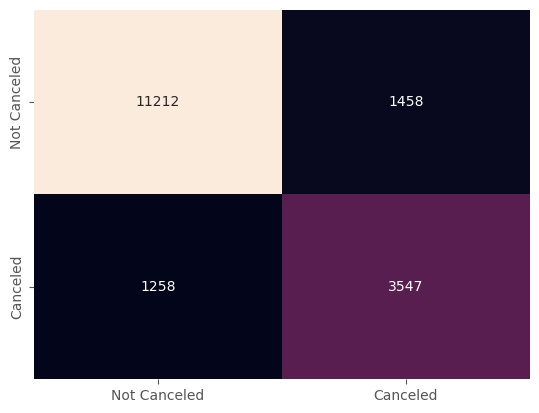

In [305]:
confusionMatrix=confusion_matrix(Y_test,Model.predict(X_test))
sns.heatmap(confusionMatrix,annot=True,cbar=False,fmt='d',xticklabels=['Not Canceled','Canceled'],yticklabels=['Not Canceled','Canceled'],)

<h4 style="color:#0082fcff">33. Plotting the ROC curve and calculating ROC-AUC score using model predictions to evaluate binary classification performance</h4>

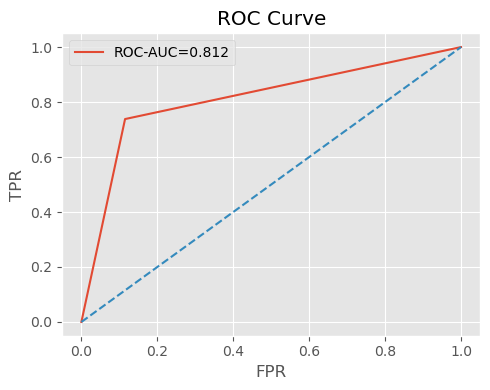

In [306]:
fpr, tpr, _ = roc_curve(Y_test, Model.predict(X_test))
roc_auc_score(Y_test, Model.predict(X_test))
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC-AUC={roc_auc_score(Y_test, Model.predict(X_test)):.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend(); plt.tight_layout(); plt.show()